

1. Read the dataset
2. Drop the columns which are unique for all users like IDs 
3. Distinguish the feature and target set 
4. Divide the data set into Train and test sets
5. Normalize the train and test data 
6. Initialize &amp; build the model 
7. Optimize the model 
9. Predict the results using 0.5 as a threshold 
10. Print the Accuracy score and confusion matrix 

In [0]:
import tensorflow as tf



In [0]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()
tf.set_random_seed = 8


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Read the dataset**

In [0]:
import pandas as pd
bank_df = pd.read_csv('/content/drive/My Drive/deep learning/R6_Project/DeepLearning_R6_Project1/bank.csv')

**2. Drop the columns which are unique for all users like IDs**

In [5]:
# We will first do an EDA to understand how the data looks

bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [0]:
#Deleting unique columns
#Getting the value of the column headers using slicing to use them in the drop column statement
columns = list(bank_df.columns.values[0 : 3])
bank_df.drop(columns, axis=1, inplace=True)

In [9]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
bank_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

We can one hot encode Geography and Gender

In [0]:
geo_df = pd.get_dummies(bank_df['Geography'], prefix='Geography', drop_first = True)
bank_df = bank_df.join(geo_df)
bank_df.drop('Geography', axis=1, inplace = True)

gender_df = pd.get_dummies(bank_df['Gender'], prefix='', drop_first=True)
bank_df = bank_df.join(gender_df)

In [0]:
bank_df.drop('Gender',axis =1, inplace = True)


**3. Distinguish the feature and target set **



In [0]:
X = bank_df.drop('Exited', axis=1)
y = bank_df['Exited']

**4. Divide the data set into Train and test sets**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.3,random_state = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
X_train.shape, y_train.shape

((3000, 11), (3000,))

In [16]:
X_test.shape, y_test.shape

((7000, 11), (7000,))

**5. Normalize the train and test data**

In [0]:
#X_train_scaled =  


**6. Initialize & build the model**

In [17]:

#initialize the model
model = tf.keras.models.Sequential()

#normalize the data
model.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

#output layer
model.add(tf.keras.layers.Dense(1))
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.05,clipnorm=1)

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [18]:
#epochs is the number of iterations
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=30,
          batch_size=32)

Train on 3000 samples, validate on 7000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
3000/3000 [==============================] - 1s 486us/sample - loss: 0.6083 - val_loss: 0.2214
Epoch 2/30
3000/3000 [==============================] - 1s 200us/sample - loss: 0.1658 - val_loss: 0.1443
Epoch 3/30
3000/3000 [==============================] - 1s 194us/sample - loss: 0.1418 - val_loss: 0.1383
Epoch 4/30
3000/3000 [==============================] - 1s 196us/sample - loss: 0.1398 - val_loss: 0.1375
Epoch 5/30
3000/3000 [==============================] - 1s 192us/sample - loss: 0.1405 - val_loss: 0.1374
Epoch 6/30
3000/3000 [==============================] - 1s 195us/sample - loss: 0.1411 - val_loss: 0.1372
Epoch 7/30
3000/3000 [==============================] - 1s 190us/sample - loss: 0.1407 - val_loss: 0.1374
Epoch 8/30
3000/3000 [==============================] - 1s 193us/sample - loss: 0.1398 - val_loss: 0.1375
Epoch 9/30
3000/3000 [==============================] - 

In [0]:
prediction = model.predict_classes(X_test)

In [20]:
prediction.shape,y_test.shape

((7000, 1), (7000,))

In [0]:
prediction = prediction.reshape((7000,))

In [22]:
prediction.shape

(7000,)

In [23]:
d = {'y_test': y_test}
df = pd.DataFrame(data=d)
df['prediction'] = prediction
df.head(30)

,y_test,prediction
7054,0,0
442,0,0
3954,0,0
2288,0,0
3196,0,0
6178,0,0
8351,0,0
5658,1,0
2065,0,0
413,1,0


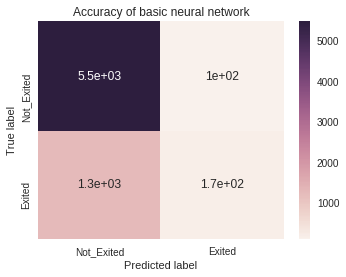

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, prediction) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Not_Exited','Exited'], 
                     columns = ['Not_Exited','Exited'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy of basic neural network'.format(accuracy_score(y_test, prediction)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [25]:
confusion_matrix(y_test, prediction) 

array([[5474,  103],
       [1255,  168]])

In [26]:
accuracy_score(y_test, prediction)

0.806

This is the confusion matrix for the basic neural network. Now lets try some tweaks or optimizations to make the accuracy better.

**7.Optimize the model**

Case 1: We will try adding a hidden layer as the first step

In [0]:

#Initialize Sequential model

#initialize the model
model1 = tf.keras.models.Sequential()

#normalize the data
model1.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(10, input_shape=(11,), activation='sigmoid'))



#output layer
model1.add(tf.keras.layers.Dense(1))
#sgd_optimizer = tf.keras.optimizers.SGD(lr=0.05,clipnorm=1)

#Compile the model - add Loss and Gradient Descent optimizer
model1.compile(optimizer='sgd', loss='mse')

In [28]:
#epochs is the number of iterations
model1.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=30,
          batch_size=32)

Train on 3000 samples, validate on 7000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 290us/sample - loss: 0.2882 - val_loss: 0.1981
Epoch 2/30
3000/3000 [==============================] - 1s 203us/sample - loss: 0.1877 - val_loss: 0.1750
Epoch 3/30
3000/3000 [==============================] - 1s 203us/sample - loss: 0.1753 - val_loss: 0.1679
Epoch 4/30
3000/3000 [==============================] - 1s 200us/sample - loss: 0.1667 - val_loss: 0.1627
Epoch 5/30
3000/3000 [==============================] - 1s 204us/sample - loss: 0.1597 - val_loss: 0.1578
Epoch 6/30
3000/3000 [==============================] - 1s 197us/sample - loss: 0.1560 - val_loss: 0.1541
Epoch 7/30
3000/3000 [==============================] - 1s 203us/sample - loss: 0.1521 - val_loss: 0.1513
Epoch 8/30
3000/3000 [==============================] - 1s 200us/sample - loss: 0.1494 - val_loss: 0.1484
Epoch 9/30
3000/3000 [==============================] - 1s 205us/sample - loss: 0.1480 - val_loss: 0.146

In [29]:
prediction = model1.predict_classes(X_test)
prediction.shape,y_test.shape

((7000, 1), (7000,))

In [30]:
prediction = prediction.reshape((7000,))
prediction.shape

(7000,)

In [31]:
df_model1=pd.DataFrame({'y_test':y_test})
df_model1['predict']= prediction
df_model1

,y_test,predict
7054,0,0
442,0,0
3954,0,0
2288,0,0
3196,0,0
6178,0,0
8351,0,0
5658,1,0
2065,0,0
413,1,0


In [32]:
confusion_matrix(y_test, prediction) 

array([[5528,   49],
       [1282,  141]])

In [33]:
accuracy_score(y_test, prediction)

0.8098571428571428

There is just a slight increase in the accuracy score.

Case : 2 Let's try changing the learning rate along with addding hidden layers

In [0]:
#We will try adding a hidden layer as the first step
#Initialize Sequential model

#initialize the model
model2 = tf.keras.models.Sequential()

#normalize the data
model2.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

#Add 1st hidden layer
model2.add(tf.keras.layers.Dense(10, input_shape=(11,), activation='sigmoid'))



#output layer
model2.add(tf.keras.layers.Dense(1))

sgd_optimizer = tf.keras.optimizers.SGD(lr=0.1,clipnorm=1)


#Compile the model - add Loss and Gradient Descent optimizer
model2.compile(optimizer=sgd_optimizer, loss='mse')

In [35]:
#epochs is the number of iterations
model2.fit(X_train, y_train,
           validation_data=(X_test, y_test), 
           epochs=30,
           batch_size=32)

Train on 3000 samples, validate on 7000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 319us/sample - loss: 0.1951 - val_loss: 0.1550
Epoch 2/30
3000/3000 [==============================] - 1s 218us/sample - loss: 0.1487 - val_loss: 0.1417
Epoch 3/30
3000/3000 [==============================] - 1s 223us/sample - loss: 0.1444 - val_loss: 0.1383
Epoch 4/30
3000/3000 [==============================] - 1s 214us/sample - loss: 0.1431 - val_loss: 0.1378
Epoch 5/30
3000/3000 [==============================] - 1s 218us/sample - loss: 0.1436 - val_loss: 0.1374
Epoch 6/30
3000/3000 [==============================] - 1s 222us/sample - loss: 0.1420 - val_loss: 0.1375
Epoch 7/30
3000/3000 [==============================] - 1s 213us/sample - loss: 0.1423 - val_loss: 0.1369
Epoch 8/30
3000/3000 [==============================] - 1s 219us/sample - loss: 0.1420 - val_loss: 0.1368
Epoch 9/30
3000/3000 [==============================] - 1s 214us/sample - loss: 0.1405 - val_loss: 0.137

In [36]:
prediction2 = model2.predict_classes(X_test)
prediction2.shape,y_test.shape

((7000, 1), (7000,))

In [37]:
prediction2 = prediction2.reshape((7000,))
prediction2.shape

(7000,)

In [38]:
df_model2=pd.DataFrame({'y_test':y_test})
df_model2['predict']= prediction2
df_model2

,y_test,predict
7054,0,0
442,0,0
3954,0,0
2288,0,0
3196,0,0
6178,0,0
8351,0,0
5658,1,0
2065,0,0
413,1,0


In [39]:
confusion_matrix(y_test, prediction) 

array([[5528,   49],
       [1282,  141]])

In [40]:
accuracy_score(y_test, prediction)

0.8098571428571428

**8. Predict the results using 0.5 as a threshold**

In [41]:
predict = model2.predict(X_test)
predict.shape,y_test.shape

((7000, 1), (7000,))

In [42]:
#predict_classes gives the binary classification (0 or 1) whereas predict() gives the probability of belonging to a particular class
predict

array([[0.1757578 ],
       [0.10796276],
       [0.15751055],
       ...,
       [0.08690271],
       [0.04582912],
       [0.11271414]], dtype=float32)

In [0]:
def binary(p):
  if p>0.5:
    return 1
  else:
    return 0

predict_with_threshold = map(binary,predict)

In [55]:
import numpy as np
predict_with_threshold = list(predict_with_threshold)
predict_with_threshold=np.array(predict_with_threshold)
predict_with_threshold.shape

(7000,)

In [56]:
df_model2=pd.DataFrame({'y_test':y_test})
df_model2['predict']= predict_with_threshold
df_model2

,y_test,predict
7054,0,0
442,0,0
3954,0,0
2288,0,0
3196,0,0
6178,0,0
8351,0,0
5658,1,0
2065,0,0
413,1,0


In [57]:
confusion_matrix(y_test, prediction) 

array([[5528,   49],
       [1282,  141]])

In [58]:
accuracy_score(y_test, prediction)

0.8098571428571428

In [0]:
#predicting with threshold 0.5 yields the same result as the case 2. So while computing predict_classes the default threshold taken is 0.5